# Analysis of accidents along road 90

In [122]:
import pandas as pd
from siuba import *
import plotly.express as px
import numpy as np
from plotnine import *

In [325]:
# Parameters along road 90 for our analysis
# Numbers taken from: https://he.wikipedia.org/wiki/%D7%9B%D7%91%D7%99%D7%A9_90#%D7%A6%D7%9E%D7%AA%D7%99%D7%9D_%D7%95%D7%9E%D7%97%D7%9C%D7%A4%D7%99%D7%9D_%D7%9C%D7%90%D7%95%D7%A8%D7%9A_%D7%94%D7%9B%D7%91%D7%99%D7%A9
double_lane = [11.9, 60.4]   # From Eilot junction to Ktora Junction
single_lane = [60.4, 180.5]  # Till Arava Junction

length_single_lane = single_lane[1] - single_lane[0]
length_double_lane = double_lane[1] - double_lane[0]

## Read in the accident count data and clean it

In [450]:
df = pd.read_excel("../data/accidents_with_casualties/file_084b50e9-6039-406d-9600-32d5122ca3d0_longer.xlsx",
    header=20, usecols="A:F", names=['location', 'year', 'total', 'fatal', 'severe', 'light'])
df
total_str = df.iloc[0,1]
unknown_str = df.loc[44, 'location']

df = (
    df
    .replace(total_str, np.nan)
    .replace(unknown_str, np.nan)
    .dropna(how='any', axis=0, subset=['location', 'year'])
    # .fillna(0)
)
# df.location = df.location.str.replace(".x", ".0")
# df.location = df.location.astype(float)
# df = df >> filter(_.location >= double_lane[0], _.location <= single_lane[1])
# df = df >> mutate(place = if_else(
#     _.location >= single_lane[0], 'single lane', 'double lane'
# ))
df

,location,year,total,fatal,severe,light
63,000.0,2003.0,30.0,1.0,4.0,25.0
64,000.0,2004.0,43.0,2.0,4.0,37.0
65,000.0,2005.0,30.0,1.0,3.0,26.0
66,000.0,2006.0,54.0,1.0,8.0,45.0
67,000.0,2007.0,36.0,1.0,2.0,33.0
...,...,...,...,...,...,...
23833,476.0,2011.0,1.0,NaN,NaN,1.0
23835,476.2,2009.0,1.0,1.0,NaN,NaN
23836,476.2,2019.0,1.0,NaN,1.0,NaN
23838,476.6,2015.0,1.0,NaN,NaN,1.0


## Read in casualty counts with road type

In [327]:
df_with_road_type = pd.read_excel("../data/casualties_in_accidents/file_2a3435aa-6fe5-460a-84ad-b3178d646db4_road_distinctions.xlsx",
    header=22, usecols="A:G")

df_with_road_type

,"מספר הק""מ - מקום אירוע התאונה",שנת תאונה,דרך חד מסלולית,סה''כ,הרוג,פצוע קשה,פצוע קל
0,סה''כ,סה''כ,סה''כ,2733,85.0,237.0,2411.0
1,סה''כ,סה''כ,לא ידוע,803,9.0,32.0,762.0
2,סה''כ,סה''כ,חד סיטרי,112,1.0,16.0,95.0
3,סה''כ,סה''כ,דו סיטרי + קו הפרדה רצוף,600,23.0,55.0,522.0
4,סה''כ,סה''כ,דו סיטרי אין קו הפרדה רצוף,1019,41.0,99.0,879.0
...,...,...,...,...,...,...,...
2612,476.6,2015,דו סיטרי אין קו הפרדה רצוף,9,NaN,NaN,9.0
2613,477.1,סה''כ,סה''כ,13,NaN,NaN,13.0
2614,477.1,סה''כ,דו סיטרי אין קו הפרדה רצוף,13,NaN,NaN,13.0
2615,477.1,2012,סה''כ,13,NaN,NaN,13.0


## Read in the casualty count and clean it

In [328]:
df_casualties = pd.read_excel("../data/casualties_in_accidents/file_5c6cf05f-2fa2-4ffb-b06a-a721caca2d1e_more_years_real.xlsx",
    header=22, usecols="A:F", names=['year', 'location', 'total', 'killed', 'severe_injury', 'light_injury'])

df_casualties = (
    df_casualties
    .replace(total_str, np.nan)
    .replace(unknown_str, np.nan)
    .dropna(how='any', axis=0, subset=['location', 'year'])
    .fillna(0)
)
df_casualties.location = df_casualties.location.str.replace(".x", ".0")
df_casualties.location = df_casualties.location.astype(float)
df_casualties = df_casualties >> filter(_.location >= double_lane[0], _.location <= single_lane[1])
df_casualties = df_casualties >> mutate(place = if_else(
    _.location >= single_lane[0], 'single lane', 'double lane'
))
df_casualties

/tmp/ipykernel_318204/2630699727.py:13: FutureWarning: The default value of regex will change from True to False in a future version.


,year,location,total,killed,severe_injury,light_injury,place
820,2003.0,14.6,4,0.0,0.0,4.0,double lane
821,2003.0,16.5,4,0.0,0.0,4.0,double lane
822,2003.0,24.3,11,0.0,0.0,11.0,double lane
823,2003.0,39.9,4,0.0,0.0,4.0,double lane
824,2003.0,43.0,27,1.0,4.0,22.0,double lane
...,...,...,...,...,...,...,...
2226,2021.0,129.4,4,0.0,1.0,3.0,single lane
2227,2021.0,129.8,4,0.0,0.0,4.0,single lane
2228,2021.0,131.0,3,0.0,3.0,0.0,single lane
2229,2021.0,134.7,3,0.0,0.0,3.0,single lane


In [398]:
# Road casualties in Junctions
df_cas_junc = pd.read_excel("../data/casualties_in_accidents/file_9fc3df34-3a59-4533-852f-f511060331d4_junctions.xlsx",
header=22, usecols="A:F", names=["location", "year", "total", "killed", "severe_injury", "light_injury"])

df_cas_junc = (
    df_cas_junc
    .replace(total_str, np.nan)
    .replace(unknown_str, np.nan)
    .dropna(how='any', axis=0, subset=['location', 'year'])
    .fillna(0)
)
df_cas_junc.location = df_cas_junc.location.str.replace(".x", ".0")
df_cas_junc.location = df_cas_junc.location.astype(float)
df_cas_junc = df_cas_junc >> filter(_.location >= double_lane[0], _.location <= single_lane[1])
df_cas_junc = df_cas_junc >> mutate(place = if_else(
    _.location >= single_lane[0], 'single lane', 'double lane'
))
df_cas_junc

/tmp/ipykernel_318204/2640783536.py:12: FutureWarning: The default value of regex will change from True to False in a future version.


,location,year,total,killed,severe_injury,light_injury,place
37,14.0,2011.0,1,0.0,0.0,1.0,double lane
39,14.3,2020.0,1,0.0,0.0,1.0,double lane
41,14.4,2009.0,1,0.0,0.0,1.0,double lane
43,14.5,2006.0,7,0.0,0.0,7.0,double lane
45,14.6,2003.0,4,0.0,0.0,4.0,double lane
...,...,...,...,...,...,...,...
613,180.0,2013.0,11,0.0,1.0,10.0,single lane
614,180.0,2017.0,2,0.0,2.0,0.0,single lane
616,180.1,2003.0,1,0.0,1.0,0.0,single lane
617,180.1,2008.0,4,0.0,0.0,4.0,single lane


In [401]:
(
    df_cas_junc
    >> filter(_.place=="single lane")
    >> summarize(total_killed=_.killed.sum())
)

,total_killed
0,57.0


In [404]:
(
    df_casualties
    # >> filter(_.place=="single lane")
    >> filter(_.year >= 2014, _.year <= 2019)
    >> filter(_.location < 177.1)
    >> summarize(total_killed=_.killed.sum())
)

,total_killed
0,21.0


# Plots

## Timeseries plot of casualties

In [329]:
(
    df_casualties
    >> group_by(_.place, _.year)
    >> summarize(total=_.total.sum())
    >> mutate(road_length=if_else(_.place=='single lane', length_single_lane, length_double_lane))
    >> mutate(total_per_km=_.total / _.road_length)
    >> arrange(_.year)
    >> pipe(lambda x: px.line(x, x='year', y='total', color='place'))
)

## Casualties along road 90

In [330]:
df_junctions = pd.DataFrame({
    'name': ['Eilot',
        'Meches', 'Beer Ora', 'Timna', 'Samar', 'Yotvata', 'Grophit', 'Ktora', 'Yahel', 'Menuha', 'Paran',
        'Tsukim', 'Tzofar', 'Sapir', 'Ein Yahav', 'Hazeva', 'Ein Hazeva Junc', 'Haarava Junc'
        ],
    'location':[
        11.9, 15.6, 27, 36, 41.3, 49.5, 54, 60.4, 72.3, 97.6, 105.9, 120.4, 128.9, 134.8, 138.6, 153.4, 158.2, 180.5]
})

df_junctions

,name,location
0,Eilot,11.9
1,Meches,15.6
2,Beer Ora,27.0
3,Timna,36.0
4,Samar,41.3
5,Yotvata,49.5
6,Grophit,54.0
7,Ktora,60.4
8,Yahel,72.3
9,Menuha,97.6


In [407]:
casualties_per_year_per_place = (
    df_casualties
    >> mutate(year_ind=_.year >= 2018)
    >> group_by(_.place, _.year_ind)
    >> summarize(killed=_.killed.sum() / _.year.nunique())    
)
casualties_per_year_per_place

,place,year_ind,killed
0,double lane,False,1.533333
1,double lane,True,1.500000
2,single lane,False,3.133333
3,single lane,True,2.500000


In [382]:
print("double lane", double_lane[1] - double_lane[0])
print("single_lane", single_lane[1] - single_lane[0])

double lane 48.5
single_lane 120.1


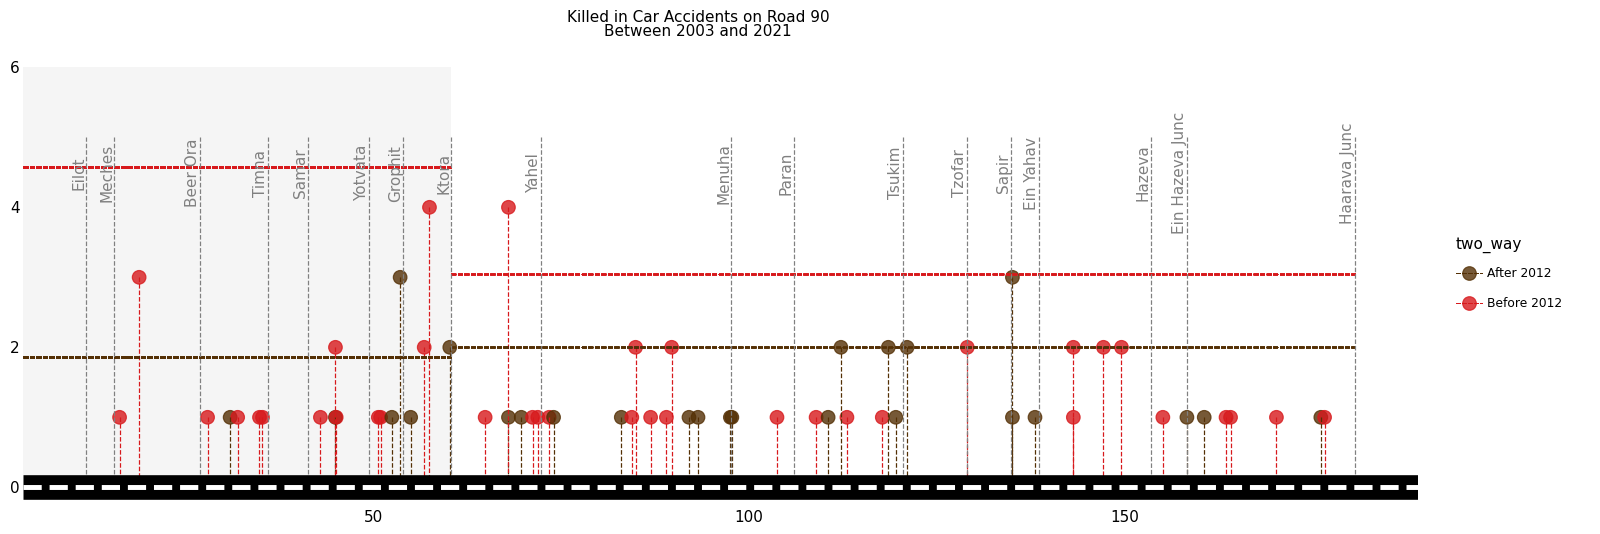

<ggplot: (8737493709050)>

In [408]:
df_casualties['loc_bins'] = pd.cut(df_casualties.location, bins=50)
df_casualties['five_year'] = pd.cut(df_casualties.year, bins=[2003, 2005,2010, 2015, 2020, 2021])

color_dict = {
    'Before 2012': '#d7191c',
    'After 2012': '#543005'
}
height_base=10
(
    df_casualties
    >> group_by(_.location, _.year)
    # >> filter(_.year > 2012)
    >> summarize(total=_.killed.sum(), mean_loc=_.location.mean())
    >> mutate(two_way=if_else((_.year < 2012), 'Before 2012', 'After 2012'))
    >> (
        ggplot(aes(x='location', y='total'))
        # One / two way roads
        + geom_rect(xmin=0, xmax=double_lane[1], ymin=0, ymax=6, alpha=1, fill='#F5F5F5')

        # Casualties
        + geom_point(aes(color='two_way'), size=5,  alpha=.8) # + scale_color_identity()
        + geom_segment(aes(xend='location', color='two_way'), yend=0, linetype='dashed')

        + scale_color_manual(color_dict)

        # Casualties per year per place
        + geom_segment(x=0, xend=double_lane[1], y=2.222222*100/length_double_lane, yend=2.222222*100/length_double_lane, linetype='dashed', color=color_dict['Before 2012'])
        + geom_segment(x=0, xend=double_lane[1], y=0.9*100/length_double_lane, yend=0.9*100/length_double_lane, linetype='dashed', color=color_dict['After 2012'])

        + geom_segment(x=single_lane[0], xend=single_lane[1], y=3.666667*100/length_single_lane, yend=3.666667*100/length_single_lane, linetype='dashed', color=color_dict['Before 2012'])
        + geom_segment(x=single_lane[0], xend=single_lane[1], y=2.4*100/length_single_lane, yend=2.4*100/length_single_lane, linetype='dashed', color=color_dict['After 2012'])

        # Junctions
        + geom_segment(aes(x='location', xend='location'), df_junctions, y=0, yend=height_base-5, linetype='dashed', color='gray')
        + geom_text(aes(x='location', label='name', y='4.5'), df_junctions, angle=90, ha='right', color='gray')


        # "Road"
        + geom_hline(yintercept=0, size=10)
        + geom_hline(yintercept=0, size=2, color='white', linetype='dashed')
        + ylim(0, 6)
        + theme_void()
        + theme(
            figure_size=(18, 6),
            axis_text_x=element_text(),
            axis_text_y=element_text(),
            axis_ticks_major=element_line(size=1)
            
            # axis_line_y=element_line(size=1, color='red')
        )
        + ggtitle("Killed in Car Accidents on Road 90\nBetween 2003 and 2021")
    )
)

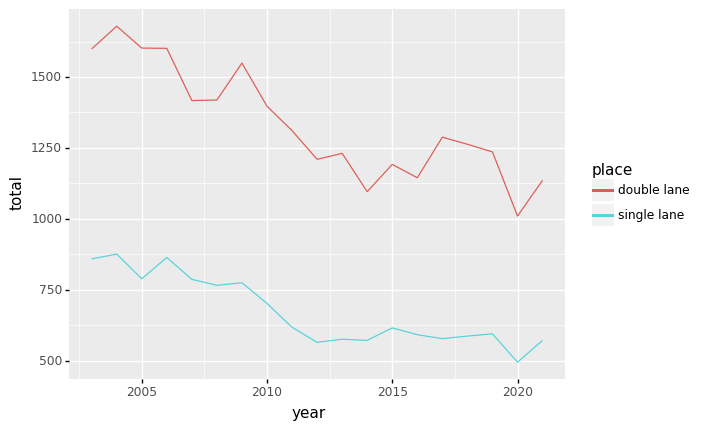

<ggplot: (8737496607687)>

In [445]:
(
    df
    >> filter(_.year < 2022)
    >> group_by(_.year, _.place)
    >> summarize(total=_.total.sum(), fatal=_.fatal.sum(), severe=_.severe.sum(), light=_.light.sum())
    >> (
        ggplot(aes(x='year', y='total', color='place'))
        + geom_line()
    )
)

## Moving average plot along road 90

In [353]:
df_casualties.groupby(['year', 'location']).sum().reset_index()

,year,location,total,killed,severe_injury,light_injury
0,2003.0,14.6,4,0.0,0.0,4.0
1,2003.0,16.5,4,0.0,0.0,4.0
2,2003.0,24.3,11,0.0,0.0,11.0
3,2003.0,39.9,4,0.0,0.0,4.0
4,2003.0,43.0,27,1.0,4.0,22.0
...,...,...,...,...,...,...
317,2021.0,129.4,4,0.0,1.0,3.0
318,2021.0,129.8,4,0.0,0.0,4.0
319,2021.0,131.0,3,0.0,3.0,0.0
320,2021.0,134.7,3,0.0,0.0,3.0


/home/omri/.pyenv/versions/3.9.2/envs/ml39/lib/python3.9/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


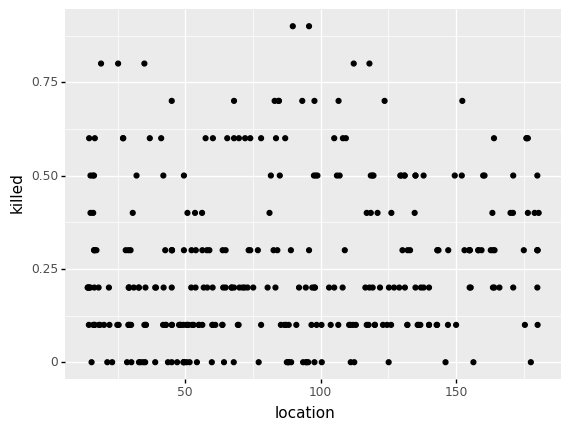

<ggplot: (8737497362929)>

In [356]:
(
    df_casualties.rolling(window=10, on='location').mean() #.fillna(0)
    >> (
        ggplot(aes(x='location', y='killed'))
        + geom_point()
    )
)

In [139]:
# Total in the last 10 years
(
    df_casualties
    >> group_by(_.location)
    >> summarize(total=_.total.sum(), killed=_.killed.sum())
    >> mutate(road_length=if_else(_.location=="single lane", length_single_lane, length_double_lane))
    >> mutate(tota_per_km=_.total / _.road_length, killed_per_km=_.killed/_.road_length)
)

,location,total,killed,road_length,tota_per_km,killed_per_km
0,double lane,193,14.0,44.8,4.308036,0.312500
1,single lane,347,26.0,120.1,2.889259,0.216486


In [91]:
df_agg = (
    df_place
    >> group_by('year', 'place')
    >> summarize(total=_.total.sum(), fatal=_.fatal.sum(), severe=_.severe.sum(),
        light=_.light.sum())
    >> mutate(per_km_total=if_else(_.place=='Single Lane', _.total / length_single_lane,
                                                    _.total / length_double_lane))
    >> mutate(per_km_fatal=if_else(_.place=='Single Lane', _.fatal / length_single_lane,
                                                    _.fatal / length_double_lane))
)

df_agg

,year,place,total,fatal,severe,light,per_km_total,per_km_fatal
0,2010.0,Double Lane,5,0.0,2.0,3.0,0.104384,0.000000
1,2010.0,Single Lane,11,2.0,2.0,7.0,0.091438,0.016625
2,2011.0,Double Lane,8,2.0,0.0,6.0,0.167015,0.041754
3,2011.0,Single Lane,7,0.0,2.0,5.0,0.058188,0.000000
4,2012.0,Double Lane,10,1.0,2.0,7.0,0.208768,0.020877
5,2012.0,Single Lane,6,2.0,0.0,4.0,0.049875,0.016625
6,2013.0,Double Lane,1,0.0,0.0,1.0,0.020877,0.000000
7,2013.0,Single Lane,7,1.0,4.0,2.0,0.058188,0.008313
8,2014.0,Double Lane,7,1.0,0.0,6.0,0.146138,0.020877
9,2014.0,Single Lane,8,2.0,1.0,5.0,0.066500,0.016625


In [98]:
px.bar(df_agg, x='year', y='per_km_fatal', color='place', barmode='group')